# Mount With Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: /content/drive/MyDrive/Untitled
# show the total amount of image contain each sub folder

import os

def count_images_in_subfolders(root_folder):
  """Counts the number of images in each subfolder of the given root folder.

  Args:
    root_folder: The path to the root folder.

  Returns:
    A dictionary where keys are subfolder names and values are the number of images
    in each subfolder.
  """

  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')  # Add more if needed
  image_counts = {}

  for dirpath, dirnames, filenames in os.walk(root_folder):
    subfolder_name = os.path.relpath(dirpath, root_folder)
    if subfolder_name == '.': # Skip the root folder itself
        continue

    image_count = 0
    for filename in filenames:
        if filename.lower().endswith(image_extensions):
            image_count += 1
    if image_count > 0:
        image_counts[subfolder_name] = image_count

  return image_counts


root_folder = '/content/drive/MyDrive/babu/out'
image_counts = count_images_in_subfolders(root_folder)

for subfolder, count in image_counts.items():
    print(f"Subfolder '{subfolder}': {count} images")


Subfolder 'Normal': 505 images


In [ ]:
# Install necessary libraries
!pip install albumentations opencv-python pillow

import cv2
import os
import numpy as np
import albumentations as A
from PIL import Image
import glob

# Define input and output paths
input_folder = "/content/drive/MyDrive/babu/in"
output_folder = "/content/drive/MyDrive/babu/out"
os.makedirs(output_folder, exist_ok=True)

# Define augmentations
augmentations = [
    A.HorizontalFlip(p=1),
    A.VerticalFlip(p=1),
    A.Rotate(limit=30, p=1),
    A.RandomBrightnessContrast(p=1),
    A.GaussNoise(var_limit=(10.0, 50.0), p=1),
    A.GaussianBlur(blur_limit=(3, 7), p=1),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=1),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1),
    A.CLAHE(clip_limit=4.0, tile_grid_size=(8,8), p=1),
    A.GridDistortion(p=1),
    A.ElasticTransform(p=1),
    A.RandomCrop(height=400, width=400, p=1)  # Adjust size as needed
]

# Process all JPG images in the input folder
image_paths = glob.glob(os.path.join(input_folder, "*.jpg"))

for img_path in image_paths:
    # Load image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Get filename without extension
    filename = os.path.basename(img_path).split('.')[0]

    # Apply augmentations and save as JPG
    for i, aug in enumerate(augmentations):
        augmented = aug(image=image)['image']
        aug_img_path = os.path.join(output_folder, f"{filename}_aug_{i+1}.jpg")
        Image.fromarray(augmented).save(aug_img_path, "JPEG", quality=95)  # Save as high-quality JPG

print(f"✅ Augmentation completed! Images saved in: {output_folder}")


<ipython-input-3-b71420d8396e>:22: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=1),


✅ Augmentation completed! Images saved in: /content/drive/MyDrive/babu/out


In [ ]:
# prompt: /content/drive/MyDrive/Untitled/Cropped
# File size in MB GB Kb and
# tolal image ?

import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def get_file_size(file_path):
    """Gets the file size in KB, MB, and GB."""
    size_bytes = os.path.getsize(file_path)
    size_kb = size_bytes / 1024
    size_mb = size_kb / 1024
    size_gb = size_mb / 1024
    return size_kb, size_mb, size_gb


def process_folder(folder_path):
  """Counts images and calculates total size for a folder."""
  total_size_kb = 0
  total_size_mb = 0
  total_size_gb = 0
  image_count = 0

  for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
      size_kb, size_mb, size_gb = get_file_size(file_path)

      total_size_kb += size_kb
      total_size_mb += size_mb
      total_size_gb += size_gb

      if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Add more extensions if needed
          image_count += 1

  return total_size_kb, total_size_mb, total_size_gb, image_count


folder_path = '/content/drive/MyDrive/Untitled/Cropped'

total_kb, total_mb, total_gb, image_count = process_folder(folder_path)

print(f"Folder: {folder_path}")
print(f"Total image count: {image_count}")
print(f"Total size: {total_kb:.2f} KB")
print(f"Total size: {total_mb:.2f} MB")
print(f"Total size: {total_gb:.2f} GB")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder: /content/drive/MyDrive/Untitled/Cropped
Total image count: 149
Total size: 10660.77 KB
Total size: 10.41 MB
Total size: 0.01 GB


In [ ]:
!pip install retina-face # Use the correct package name 'retina-face'
# Install the required library

# Import necessary libraries
import os
import cv2
import numpy as np
from google.colab import drive
from retinaface import RetinaFace # Now the import should work

# Mount Google Drive
drive.mount('/content/drive')

# Define input and output folder paths
input_folder_path = '/content/drive/MyDrive/Untitled/Angry'
output_folder_path = '/content/drive/MyDrive/Untitled/Cropped/Angry'

# Create output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Loop through each image in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder_path, filename)
        image = cv2.imread(image_path)

        # Detect faces using RetinaFace
        faces = RetinaFace.detect_faces(image)

        # Check if any face is detected
        if faces:
            # Get the first detected face
            face_key = list(faces.keys())[0]
            face = faces[face_key]
            x1, y1, x2, y2 = face['facial_area']

            # Crop the detected face
            detected_face = image[y1:y2, x1:x2]

            # Resize the detected face to 416x416 pixels
            detected_face_resized = cv2.resize(detected_face, (512, 512))

            # Save the cropped face image
            output_path = os.path.join(output_folder_path, f'cropped_{filename}')
            cv2.imwrite(output_path, detected_face_resized)
            print(f'Saved cropped face image: {output_path}')
        else:
            print(f'No face detected in {filename}.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5


25-02-23 12:23:30 - Directory /root/.deepface created
25-02-23 12:23:30 - Directory /root/.deepface/weights created
25-02-23 12:23:30 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


100%|██████████| 119M/119M [00:00<00:00, 320MB/s]


Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_1736067891868.jpg
Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_1736067891933.jpg
Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_1736067890754.jpg
Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_1736067891700.jpg
Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_IMG_20250102_103333.jpg
Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_1736067891885.jpg
Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_1736067890965.jpg
Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_1736067891891.jpg
Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_1736067891315.jpg
Saved cropped face image: /content/drive/MyDrive/Untitled/Cropped/Angry/cropped_1736067890630.jpg
Saved cropped 

# **Visualization**

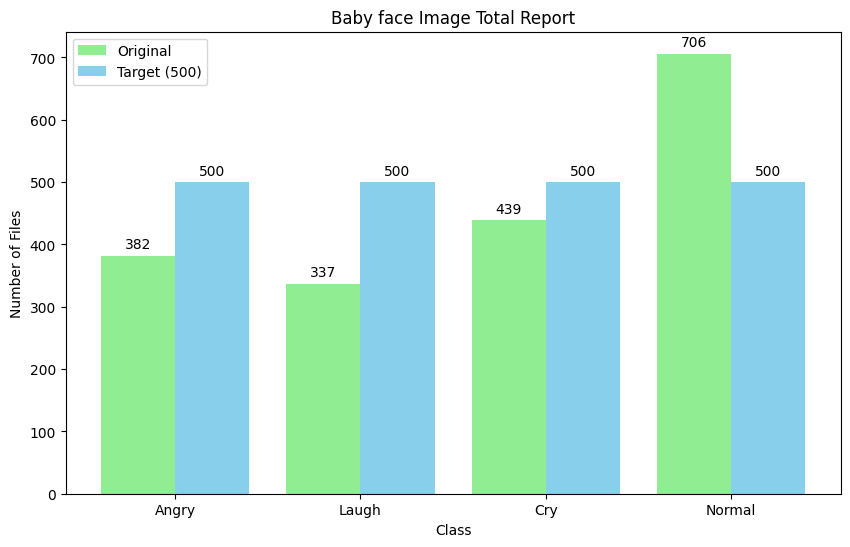

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Original data
classes = ['Angry', 'Laugh', 'Cry', 'Normal']
original_counts = [382, 337, 439, 706]

# Target data (we want 500 images per class)
target_counts = [500, 500, 500, 500]

# Plotting comparison bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# X-axis position for each class
x = np.arange(len(classes))

# Plotting the original and target data
bars_original = ax.bar(x - 0.2, original_counts, 0.4, label='Original', color='#91ed91')
bars_target = ax.bar(x + 0.2, target_counts, 0.4, label='Target (500)', color='#88cfeb')

# Adding labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Files')
ax.set_title('Baby face Image Total Report')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Add the count numbers above each bar
for bar in bars_original:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset label by 3 points
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars_target:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset label by 3 points
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
!pip install --upgrade opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


# Extra code

